In [20]:
import pandas as pd

df = pd.read_csv("dados/vendas.csv")



In [25]:
df['faturamento'] = df['preco_unitario'] * df['quantidade_vendida']
df.head()


,data_vendas,produto,categoria,preco_unitario,quantidade_vendida,estoque,faturamento
0,2024-07-14,Notebook,Eletrônicos,226.59,3,3,679.77
1,2024-10-02,Cadeira Gamer,Móveis,513.58,3,20,1540.74
2,2024-05-29,Monitor,Eletrônicos,2990.54,5,113,14952.70
3,2024-12-20,Smartphone,Eletrônicos,1461.64,1,188,1461.64
4,2024-07-15,Teclado,Periféricos,3319.76,5,22,16598.80


In [26]:
df.info()
df.groupby('data_vendas')['faturamento'].sum()


<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   data_vendas         500 non-null    str    
 1   produto             500 non-null    str    
 2   categoria           500 non-null    str    
 3   preco_unitario      500 non-null    float64
 4   quantidade_vendida  500 non-null    int64  
 5   estoque             500 non-null    int64  
 6   faturamento         500 non-null    float64
dtypes: float64(2), int64(2), str(3)
memory usage: 27.5 KB


data_vendas
2024-01-01    20700.30
2024-01-02     8015.01
2024-01-03    19639.34
2024-01-04     9968.78
2024-01-05    20922.63
                ...   
2024-12-26    25334.15
2024-12-27    17821.48
2024-12-28     5087.16
2024-12-30     1919.60
2024-12-31    14879.68
Name: faturamento, Length: 267, dtype: float64

In [27]:
import pandas as pd
import matplotlib.pyplot as plt


In [28]:
df = pd.read_csv("dados/vendas.csv")
df['data_vendas'] = pd.to_datetime(df['data_vendas'])


In [29]:
df['faturamento'] = df['preco_unitario'] * df['quantidade_vendida']


In [30]:
df.info()
df.describe()


<class 'pandas.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   data_vendas         500 non-null    datetime64[us]
 1   produto             500 non-null    str           
 2   categoria           500 non-null    str           
 3   preco_unitario      500 non-null    float64       
 4   quantidade_vendida  500 non-null    int64         
 5   estoque             500 non-null    int64         
 6   faturamento         500 non-null    float64       
dtypes: datetime64[us](1), float64(2), int64(2), str(2)
memory usage: 27.5 KB


,data_vendas,preco_unitario,quantidade_vendida,estoque,faturamento
count,500,500.000000,500.000000,500.000000,500.000000
mean,2024-07-02 01:12:00,2416.479720,2.972000,98.558000,7252.546780
min,2024-01-01 00:00:00,51.610000,1.000000,0.000000,84.930000
25%,2024-04-02 18:00:00,1194.722500,2.000000,45.000000,2800.712500
50%,2024-07-05 12:00:00,2356.455000,3.000000,100.000000,5621.820000
75%,2024-09-29 06:00:00,3633.590000,4.000000,147.250000,10410.630000
max,2024-12-31 00:00:00,4995.360000,5.000000,200.000000,24450.450000
std,NaN,1413.128749,1.391074,57.855139,5834.778185


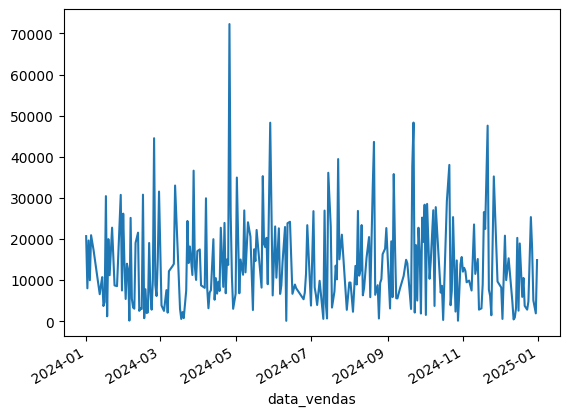

In [31]:
df.groupby('data_vendas')['faturamento'].sum().plot()
plt.show()


In [32]:
vendas_mensais = (
    df
    .groupby(df['data_vendas'].dt.to_period('M'))['faturamento']
    .sum()
    .reset_index()
)

vendas_mensais['data_vendas'] = vendas_mensais['data_vendas'].dt.to_timestamp()


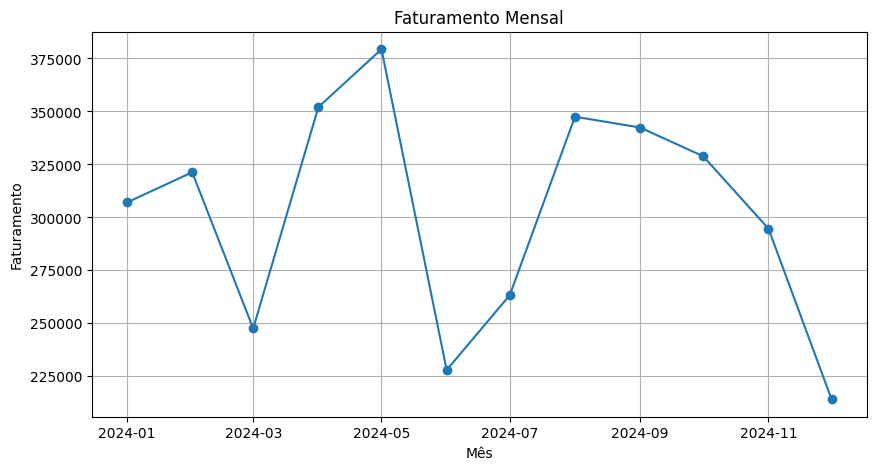

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(vendas_mensais['data_vendas'], vendas_mensais['faturamento'], marker='o')

plt.title('Faturamento Mensal')
plt.xlabel('Mês')
plt.ylabel('Faturamento')
plt.grid(True)

plt.show()


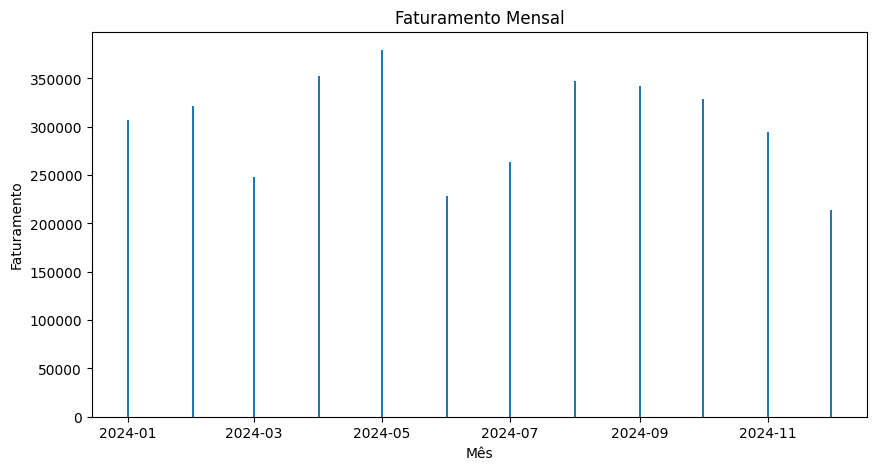

In [34]:
plt.figure(figsize=(10,5))
plt.bar(vendas_mensais['data_vendas'], vendas_mensais['faturamento'])

plt.title('Faturamento Mensal')
plt.xlabel('Mês')
plt.ylabel('Faturamento')

plt.show()


In [35]:
df['data_vendas'] = pd.to_datetime(df['data_vendas'])
df['faturamento'] = df['preco_unitario'] * df['quantidade_vendida']

vendas_mensais = (
    df
    .groupby(df['data_vendas'].dt.to_period('M'))['faturamento']
    .sum()
    .reset_index()
)

vendas_mensais['data_vendas'] = vendas_mensais['data_vendas'].dt.to_timestamp()


In [36]:
inicio = vendas_mensais.iloc[0]['faturamento']
final = vendas_mensais.iloc[-1]['faturamento']

variacao_percentual = ((final - inicio) / inicio) * 100


In [37]:
if variacao_percentual > 5:
    tendencia = "📈 Crescimento"
elif variacao_percentual < -5:
    tendencia = "📉 Queda"
else:
    tendencia = "➖ Estável"

print(f"Tendência detectada: {tendencia}")
print(f"Variação no período: {variacao_percentual:.2f}%")


Tendência detectada: 📉 Queda
Variação no período: -30.24%


c:\Users\Elton Henrique\OneDrive\analise_venda\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


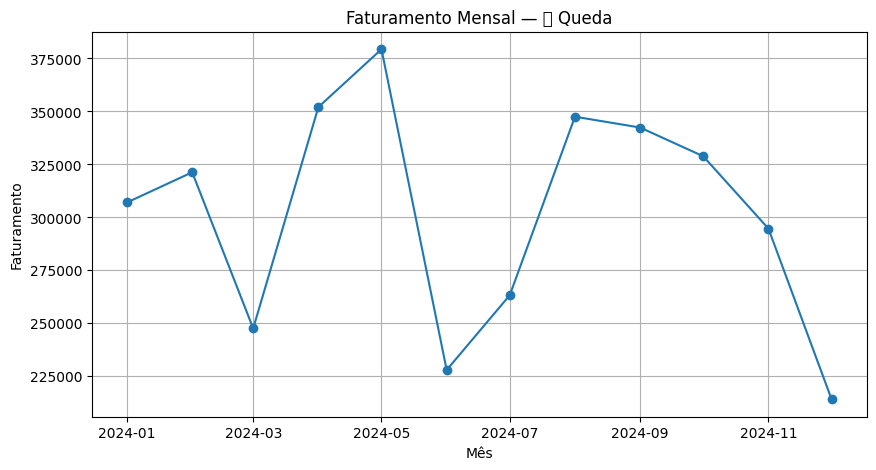

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(vendas_mensais['data_vendas'], vendas_mensais['faturamento'], marker='o')
plt.title(f"Faturamento Mensal — {tendencia}")
plt.xlabel("Mês")
plt.ylabel("Faturamento")
plt.grid(True)
plt.show()


In [39]:
import pandas as pd

df = pd.read_csv("dados/vendas.csv")
df['data_vendas'] = pd.to_datetime(df['data_vendas'])
df['faturamento'] = df['preco_unitario'] * df['quantidade_vendida']

vendas_mensais = (
    df
    .groupby(df['data_vendas'].dt.to_period('M'))['faturamento']
    .sum()
    .reset_index()
)

vendas_mensais['data_vendas'] = vendas_mensais['data_vendas'].dt.to_timestamp()


In [40]:
inicio = vendas_mensais.iloc[0]['faturamento']
final = vendas_mensais.iloc[-1]['faturamento']

variacao_percentual = ((final - inicio) / inicio) * 100


In [41]:
if variacao_percentual > 5:
    texto_analise = (
        f"O faturamento apresentou uma tendência de crescimento ao longo do período analisado, "
        f"com uma variação positiva de {variacao_percentual:.2f}%. "
        f"Esse comportamento indica um aumento consistente nas vendas, o que pode estar relacionado "
        f"a maior demanda, estratégias comerciais eficazes ou expansão do portfólio de produtos."
    )

elif variacao_percentual < -5:
    texto_analise = (
        f"O faturamento demonstrou uma tendência de queda no período analisado, "
        f"com uma redução de {abs(variacao_percentual):.2f}%. "
        f"Esse cenário pode indicar diminuição da demanda, problemas de estoque ou necessidade de "
        f"revisão das estratégias de vendas."
    )

else:
    texto_analise = (
        f"O faturamento manteve-se relativamente estável ao longo do período analisado, "
        f"com uma variação de {variacao_percentual:.2f}%. "
        f"Esse comportamento sugere equilíbrio nas vendas, sem crescimento ou retração significativa."
    )

print(texto_analise)


O faturamento demonstrou uma tendência de queda no período analisado, com uma redução de 30.24%. Esse cenário pode indicar diminuição da demanda, problemas de estoque ou necessidade de revisão das estratégias de vendas.


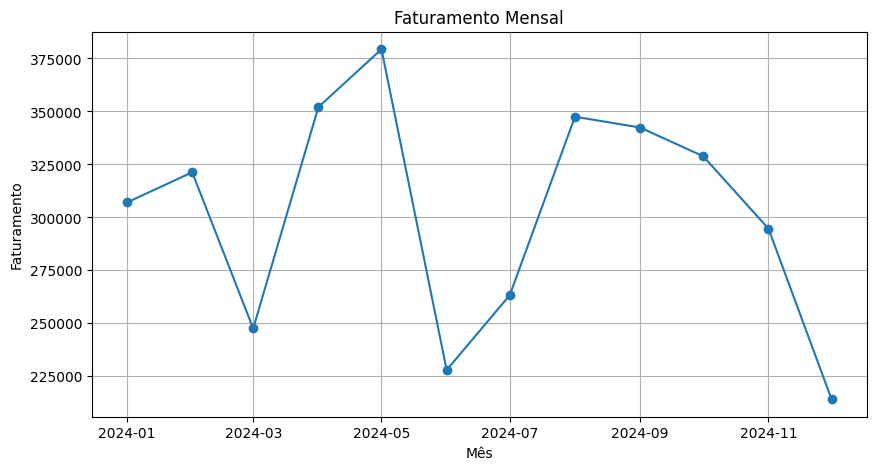


📄 Análise Automática:
O faturamento demonstrou uma tendência de queda no período analisado, com uma redução de 30.24%. Esse cenário pode indicar diminuição da demanda, problemas de estoque ou necessidade de revisão das estratégias de vendas.


In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(vendas_mensais['data_vendas'], vendas_mensais['faturamento'], marker='o')
plt.title("Faturamento Mensal")
plt.xlabel("Mês")
plt.ylabel("Faturamento")
plt.grid(True)
plt.show()

print("\n📄 Análise Automática:")
print(texto_analise)
